# **California Housing EDA**

## **1. Introduction**

### **What dataset are you looking at?**
This analysis examines the California Housing Prices dataset, derived from median house prices for California districts based on the 1990 census. The dataset, originally published by Cam Nugent on Kaggle and widely used in the machine learning community, represents one of the most popular benchmark datasets for regression analysis and predictive modeling.

### **Where/how was it created?**
The dataset originates from the StatLib repository and is based on the 1990 California census data. It consists of 20,640 samples and 8 feature variables, with each record representing aggregated housing information for a specific census block group (district) within California.
Data Collection Methodology:
The dataset was compiled through systematic census data collection, where information was gathered at the block group level - the smallest geographical unit for which the U.S. Census Bureau publishes sample data. Each record represents statistical aggregations (medians and averages) for households within these geographic districts.
Key Features Included:
The dataset contains 8 primary features: MedInc (median income), HouseAge, AveRooms (average rooms), AveBedrms (average bedrooms), Population, and AveOccup (average occupancy), along with geographical proximity information and the target variable - median house value.

### **What questions will be asked?**
This dataset enables investigation of multiple research questions relevant to real estate analytics, urban planning, and socioeconomic studies:

Primary Research Questions:

- Price Prediction Modeling: Can we build an accurate machine learning model to predict median housing prices based on demographic and housing characteristics?

- Feature Importance Analysis: Which factors have the strongest correlation with housing prices? How does median income correlate with housing values across different districts?

- Geographic Price Variations: How do housing prices vary across different regions of California, and what patterns emerge based on proximity to the ocean or urban centers?

- Socioeconomic Housing Relationships: What is the relationship between population density, average household size, and housing affordability?

Secondary Research Questions:

- Housing Density Analysis: How do average rooms per household and average occupancy rates affect property values?

- Age and Value Correlation: Does the age of housing stock significantly impact median home values across districts?

- Market Segmentation: Can we identify distinct housing market segments based on demographic and structural characteristics?

- Outlier Investigation: What districts represent outliers in terms of price relative to their characteristics, and what might explain these anomalies?

This dataset serves as an excellent foundation for exploring regression techniques, feature engineering, data preprocessing, and understanding the complex relationships between socioeconomic factors and housing markets in one of America's most dynamic real estate environments.

## 2. Cleaning and Organizing Data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the data from the .csv file
file_path = 'data/housing.csv'
df = pd.read_csv(file_path)

df_info = df.info()
df_preview = df.head()

df.shape, df.columns, df_preview

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


((20640, 10),
 Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
        'total_bedrooms', 'population', 'households', 'median_income',
        'median_house_value', 'ocean_proximity'],
       dtype='object'),
    longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
 0    -122.23     37.88                41.0        880.0           129.0   
 1    -122.22     37.86                21.0       7099.0          1106.0   
 2    -122.24     37.85                52.0       1467.0           190.0   
 3    -122.25     37.85                52.0       1274.0           235.0   
 4    -122.25     37.85                52.0       1627.0           280.0   
 
    population  households  median_income  median_house_value ocean_proximity  
 0       322.0       126.0         8.3252            452600.0        NEAR BAY  
 1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
 2       496.0       177.0         7.2574            352100.0        NEAR

### Checking for missing values

In [9]:
df.isna().any()

longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms         True
population            False
households            False
median_income         False
median_house_value    False
ocean_proximity       False
dtype: bool

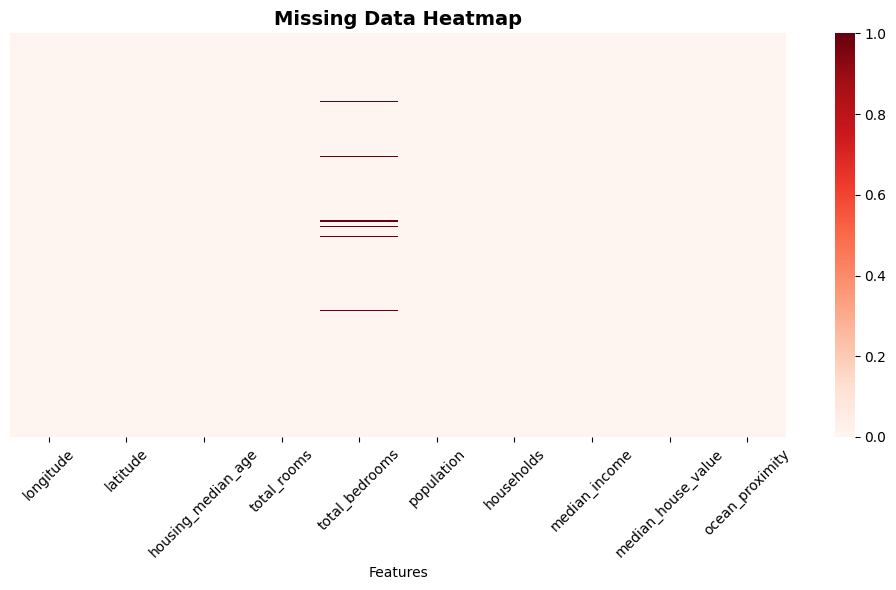

Missing values per column:
longitude: 0 (0.0%)
latitude: 0 (0.0%)
housing_median_age: 0 (0.0%)
total_rooms: 0 (0.0%)
total_bedrooms: 207 (1.0%)
population: 0 (0.0%)
households: 0 (0.0%)
median_income: 0 (0.0%)
median_house_value: 0 (0.0%)
ocean_proximity: 0 (0.0%)


In [20]:
# Check for missing values with better visualization
plt.figure(figsize=(10, 6))

# Create heatmap for missing values
sns.heatmap(df.isnull(), 
            cmap='Reds', 
            cbar=True, 
            yticklabels=False,
            xticklabels=True)

plt.title('Missing Data Heatmap', fontsize=14, fontweight='bold')
plt.xlabel('Features')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print missing data summary
print("Missing values per column:")
missing_summary = df.isnull().sum()
for col, count in missing_summary.items():
    if count > 0:
        print(f"{col}: {count} ({count/len(df)*100:.1f}%)")
    else:
        print(f"{col}: 0 (0.0%)")

In [15]:
print("Missing:", df['total_bedrooms'].isnull().sum())

Missing: 207


- Only total_bedrooms has missing values (207 rows ≈ 1.00%). 
- No clustering by row (randomly scattered), it's likely Missing at Random(MAR) due to incomplete data entry.
- No other variable has missing values and no clear correlation to other features.




### Strategies for Imputation of Deficiencies

In [ ]:

# Checking skewness
skew = df['total_bedrooms'].skew()
print(f"Skewness: {skew:.2f}")

Skewness: 3.46


Skew > +1 or < -1 highly skewed, we need to use MEDIAN for imputation of total_bedrooms (3.46)

In [21]:
median_bedrooms = df['total_bedrooms'].median()
df['total_bedrooms'].fillna(median_bedrooms, inplace=True)

/var/folders/_c/9xcb3_qn19j4t44ychtgqpdw0000gr/T/ipykernel_17738/2993604379.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['total_bedrooms'].fillna(median_bedrooms, inplace=True)


### Definition of Rules & Visualization of Violations

#### Definition of rules to check for Bad Data:
- housing_median_age should be between 0–100

- total_rooms, total_bedrooms, households, population > 0

- median_income >= 0

- median_house_value >= 0

In [29]:
df_housing = df.copy()


# Rule-based violations
violations = {
    'total_rooms': df_housing[df_housing['total_rooms'] <= 0],
    'total_bedrooms': df_housing[df_housing['total_bedrooms'] <= 0],
    'households': df_housing[df_housing['households'] <= 0],
    'population': df_housing[df_housing['population'] <= 0],
    'median_income': df_housing[df_housing['median_income'] < 0],
    'median_house_value': df_housing[df_housing['median_house_value'] < 0],
    'bedrooms > rooms': df_housing[df_housing['total_bedrooms'] > df_housing['total_rooms']],
}

# Counting violations
for col, rows in violations.items():
    print(f"{col}: {len(rows)} violations")


total_rooms: 0 violations
total_bedrooms: 0 violations
households: 0 violations
population: 0 violations
median_income: 0 violations
median_house_value: 0 violations
bedrooms > rooms: 5 violations


#### Repairing Violations

In [ ]:
# For bedrooms > rooms, calculate realistic bedroom count
# Typical bedroom-to-room ratio in housing is around 20-30%
valid_data = df_housing[df_housing['total_bedrooms'] <= df_housing['total_rooms']]
typical_bedroom_ratio = (valid_data['total_bedrooms'] / valid_data['total_rooms']).median()

print(f"\nTypical bedroom-to-room ratio: {typical_bedroom_ratio:.3f}")

mask_bedrooms = df_housing['total_bedrooms'] > df_housing['total_rooms']
df_housing.loc[mask_bedrooms, 'total_bedrooms'] = (
    df_housing.loc[mask_bedrooms, 'total_rooms'] * typical_bedroom_ratio
).round().astype(int)

print(f"Fixed {mask_bedrooms.sum()} bedroom violations using ratio {typical_bedroom_ratio:.3f}")


Typical bedroom-to-room ratio: 0.203
Fixed 5 bedroom violations using ratio 0.203


### Outlier Detection and Analysis

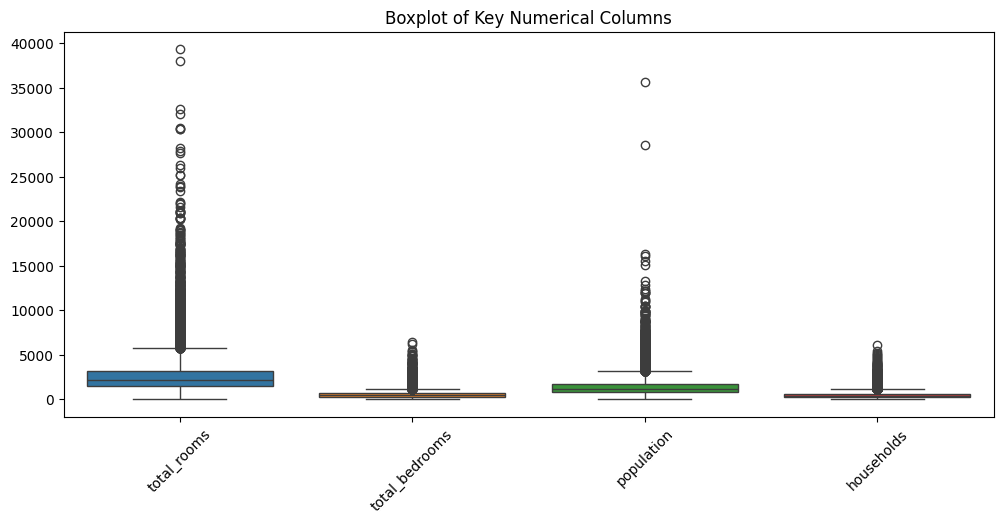

In [30]:
#Outlier visualization
plt.figure(figsize=(12, 5))
sns.boxplot(data=df_housing[['total_rooms', 'total_bedrooms', 'population', 'households']])
plt.title("Boxplot of Key Numerical Columns")
plt.xticks(rotation=45)
plt.show()


In [ ]:
numeric_cols = df_housing.select_dtypes(include=['float64', 'int64']).columns

for col in numeric_cols:
    Q1 = df_housing[col].quantile(0.25)
    Q3 = df_housing[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df_housing[(df_housing[col] < lower_bound) | (df_housing[col] > upper_bound)]
    print(f"{col}: {len(outliers)} outliers")


longitude: 0 outliers
latitude: 0 outliers
housing_median_age: 0 outliers
total_rooms: 1287 outliers
total_bedrooms: 1306 outliers
population: 1196 outliers
households: 1220 outliers
median_income: 681 outliers
median_house_value: 1071 outliers


#### Outlier Analysis Discussion
We aapplied the IQR (Interquartile Range) method to all numerical columns in the dataset to detect outliers. The results indicate that outliers are present in most housing-related variables, particularly in:

- total_rooms (1,287 outliers)

- total_bedrooms (1,306 outliers)

- population (1,196 outliers)

- households (1,220 outliers)

- median_income (681 outliers)

- median_house_value (1,071 outliers)

By contrast, no outliers were detected in longitude, latitude, and housing_median_age.

These findings suggest that extreme values are common in demographic and structural attributes of housing units. For example:

1. total_rooms and total_bedrooms have long upper tails, likely due to large apartment complexes or luxury properties.

2. population and households also show large values in certain regions, which may reflect high-density urban housing.

3. median_income and median_house_value outliers reflect economic disparities between regions, such as coastal vs. inland California.

These outliers may be genuine and represent real-world extremes, especially in large-scale housing datasets.

## 3. Visualizations

## 4. Descriptive Analysis

## 5. Conclusion